## 3-2. 선형 회귀 
#### 학습 목표
- K-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러 가지 선형 회귀 모델을 만들어 보자 

### 1. K-최근접 이웃의 한계

In [1]:
# 우선 3-1에서 사용한 데이터 준비 
import numpy as np   # 넘파이 패키지 임포트 

# 농어 길이 데이터 
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0,
    22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 
    28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0,
    42.0, 43.0, 43.0, 43.5, 44.0]
)

# 농어 무게 데이터 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0,
    130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0,
    260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
)

In [2]:
# 훈련 세트, 테스트 세트로 나누고 특성 데이터는 2차원 배열로 변환
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기 
train_input, test_input, train_target, test_target = train_test_split(
   perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기 
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
# 최근접 이웃 개수를 3으로 하는 모델을 훈련 - 앞서 3-1에서 했던 과정과 동일 
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# K-최근접 이웃 회귀 모델을 훈련 
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
# 훈련한 모델을 사용하여 길이가 50cm인 농어의 무게를 예측 
print(knr.predict([[50]]))

[1033.33333333]


- K-최근접 회귀 모델은 50cm 농어의 무게를 1,033g(1.03kg) 정도로 예측했다. 그런데 실제 이 농어의 무게는 훨씬 더 많이 나간다고 책의 예제는 이야기한다. 어디서 문제가 생긴 것일까?
- 훈련 세트와 50cm 농어 그리고 이 농어의 최근접 이웃을 산점도로 나타내보자.(참고로 앞에 2장에서 사용해본 사이킷런의 K-최근접 이웃 모델의 kneighbors() 메서드를 이용하면 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있음.)

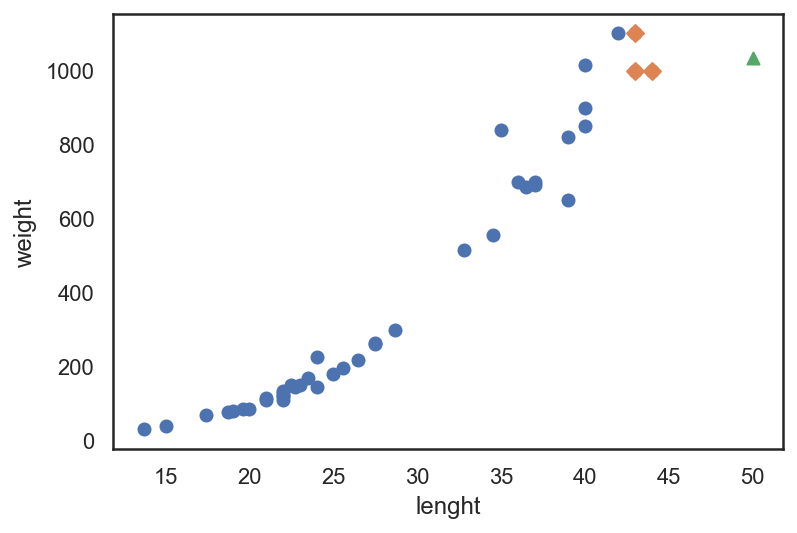

In [6]:
# 산점도 그래프 나타내기 
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련 세트 중에서 이웃 샘플만 다시 그리기 

# 50cm 농어 데이터 
plt.scatter(50, 1033, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 길이가 50cm이고 무게가 1,033g(1.03kg)인 농어는 '세모'로 표시, 그 주변의 샘플은 '다이아'로 표시.
- 해당 산점도를 보면 당연하게도 길이가 커질수록 농어의 무게가 증가하는 경향이 있다.
- 하지만 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 K-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다.

In [9]:
# 이웃 샘플들의 타깃 평균 구하기 
print(np.mean(train_target[indexes]))

1033.3333333333333


- 모델이 예측했던 값과 정확히 일치한다. 
- K-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균화 한다. 따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면, 엉뚱한 값으로 예측할 수 있다. 

In [10]:
# 100cm인 농어를 예측 - 100cm 농어도 똑같이 1,033g으로 예측 
print(knr.predict([[100]]))

[1033.33333333]


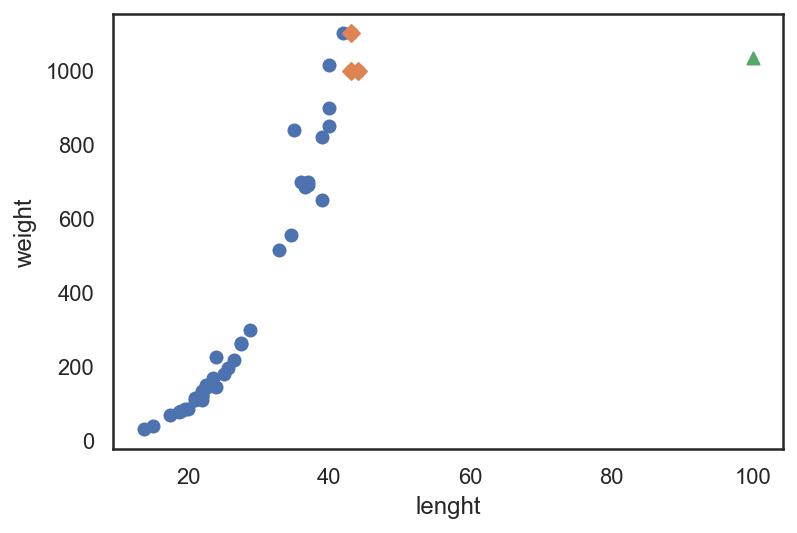

In [11]:
# 한번더 그래프로 나타내보기 

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련 세트 중에서 이웃 샘플만 다시 그리기 

# 50cm 농어 데이터 
plt.scatter(100, 1033, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 그래프를 확인한 결과 농어의 크기가 아무리 커도 무게가 더 늘어나지 않음을 알수 있다.
- K-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포함되도록 훈련세트를 다시 만들어야 한다. 하지만 이러한 방법은 매우 번거로운 방법이므로 여기서는 '선형회귀' 방법을 사용하기로 한다.

### 2. 선형 회귀 
- **선형 회귀(Linear Regression)**은 널리 사용되는 대표적인 회귀 알고리즘으로, 특성 하나인 경우 어떤 직선을 학습하는 알고리즘 이기도 하다. 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 대표 머신러닝 알고리즘 중 하나이다.

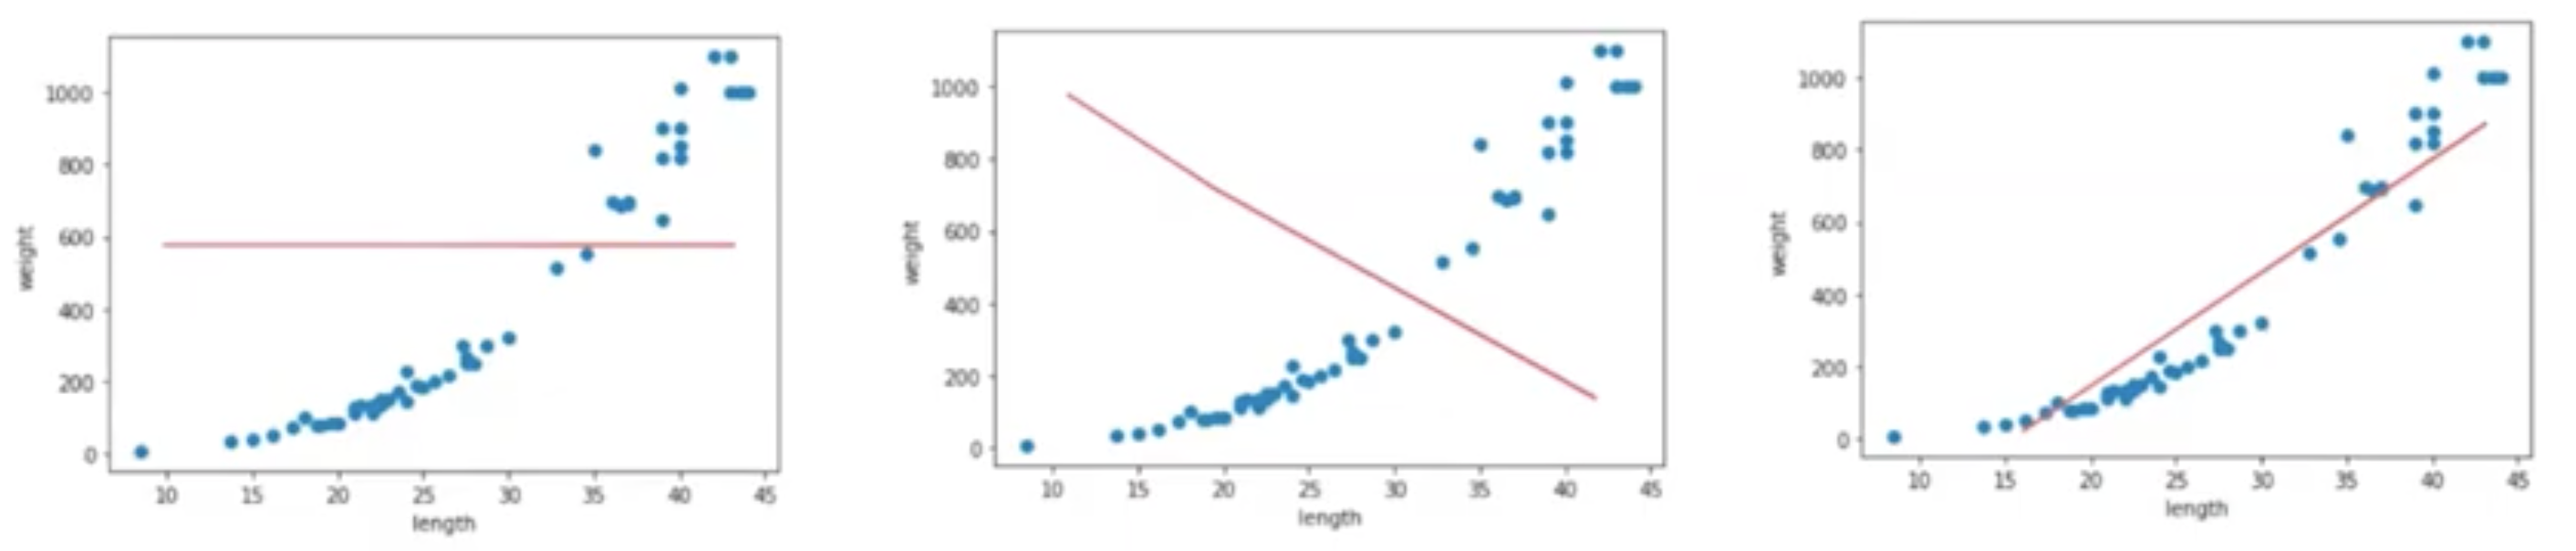

- 위 세개의 그래프를 예를들어 비교해보자.
    - 1번 그래프는 모든 농어의 무게를 하나로 예측한다. 이 직선의 위치가 만약 훈련 세트의 평균에 가깝다면 R2 스코어는 0에 가까운 값이 된다.
    - 2번 그래프는 농어 무게를 완전히 반대로 예측한다. 길이가 작은 농어의 무게가 높고 길이가 큰 농어의 무게는 낮다. 이렇게 예측하면 R2 스코어가 음수가 될 수있다.
    - 3번 그래프는 선형에 가까운 그래프이다. 
- 이런 직선을 머신러닝 알고리즘이 자동으로 찾을 수 있다. 
- 사이킷런은 **'sklearn.linear_model'** 패키지 아래에 **'LinearRegression'** 클래스로 선형 회귀 알고리즘을 구현할 수 있다.
- 참고로 해당 모델 클래스와 사이킷런의 모델 클래스들 모두, 클래스의 객체를 만들어 훈련하는 과정이 앞에 사용한 K-최근접 이웃 알고리즘과 동일하게 **훈련(fit()) -> 평가(score()) -> 예측(predict())** 순서로 진행한다.

In [12]:
# 선형 회귀 모델로 훈련, 예측 하기 

# 사이킷런 선형 회귀 패키지 임포트 
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선언
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어 예측 
print(lr.predict([[50]]))

[1241.83860323]


- 예측 결과 K-최근접 이웃 회귀를 사용했을 때와 달리 선형 회귀는 50cm 농어의 무게를 아주 높게 예측했다.
- 어떻게 이런 값이 나왔는지 살펴보면, 하나의 직선을 그리려면 기울기와 절편(좌표축과 만나는 점)이 있어야 한다. **($y = a \times x + b$)**
- 여기서 $x$를 농어의 길이, $y$를 농어의 무게로 바꾸면 아래와 같다.

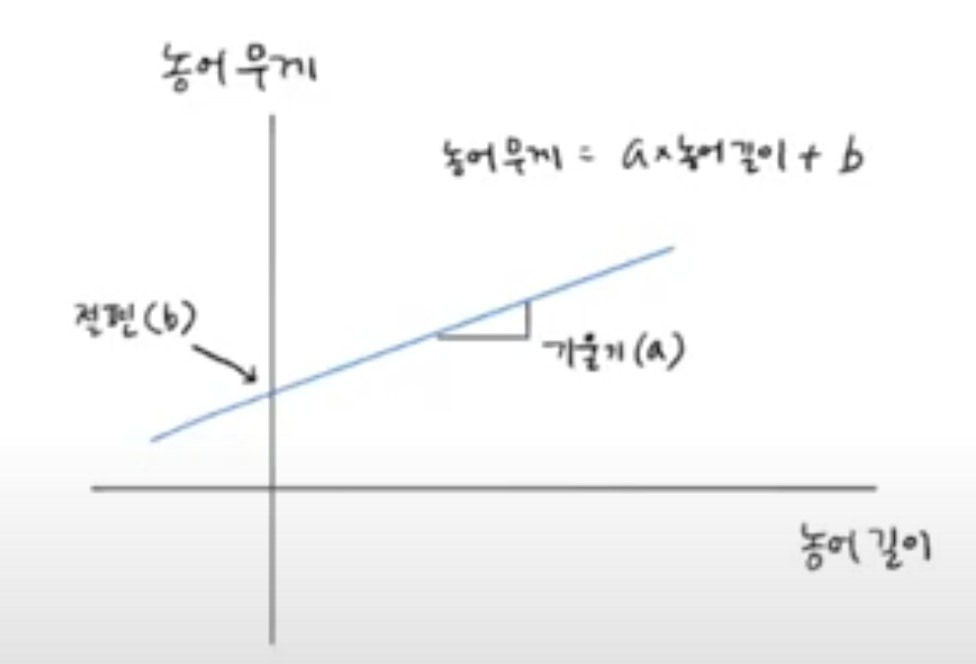

- 간단한 직선 방정식이다. 이는 LinearRegression 클래스가 이 데이터에 잘 맞는 a와 b를 잘 찾았다고 볼 수 있고, LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_ 속성에 저장되어 있다. (coef_ 속성: 머신러닝에서 기울기를 종종 **계수(coefficient)** 또는 **가중치(weight)** 라고도 함.)

In [13]:
# 기울기와 절편 출력
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- 참고로 coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)** 라고 부른다. 
- 그리고 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같은데, 이를 **모델 기반 학습** 이라고 부른다.
- 앞에서 K-최근접 이웃에는 모델 파라미터가 없다. 훈련 세트를 저장하는 것이 훈련의 전부였기 때문인데 이를 **사례 기반 학습** 이라고 부른다.

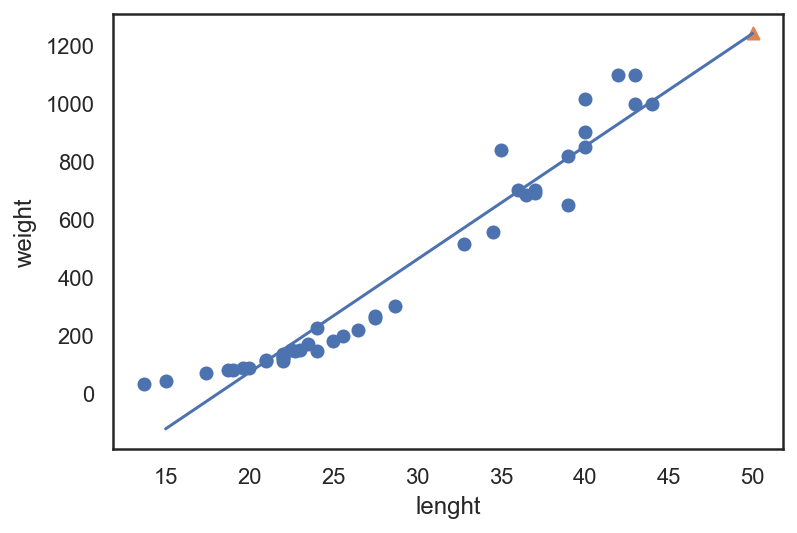

In [14]:
# 앞에서 구한 기울기와 절편을 이용하여 선형회귀 그래프 그려보기 

# 훈련 세트의 산점도 그리기 
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기 
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터 
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 농어의 길이 15에서 50까지 직선을 그려보았다. 이 직선을 그리기위해 앞에서 구한 기울기와 절편을 사용하여 (15, 15x39-709)와 (50, 15x39-709) 두 점을 이었다.
- 해당 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다. 그리고 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있다.
- 이제 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있게 되었다.

In [15]:
# R2 스코어 확인 
print(lr.score(train_input, train_target))  # 훈련 세트 
print(lr.score(test_input, test_target))    # 테스트 세트 

0.9398463339976041
0.8247503123313559


- 훈련 세트가 테스트 세트 보다 높아, 해당 모델이 과대적합 되었다고 할 수도 있겠지만, 자세히 살펴보면 훈련 세트의 점수가 그렇게 높지 않아, 오히려 전체적으로 과소적합 되었다고 보여진다.
- 그리고 과소적합 말고도 다른 문제가 존재하는듯 하다.

### 3. 다항 회귀
- 위의 선형 회귀 그래프를 기반으로 R2 스코어까지 내보았는데, 과대적합이 아닌 과소적합 그리고 다른 문제가 있는듯 한데, 그래프에 선형 회귀가 만든 직선이 아래로 쭉 뻗어있다. 만약 이 직선대로 예측하게 되면 농어의 무게(y축 기준)가 0g 이하로 내려갈텐데 이건 있을 수 없는 일이다.
- 농어의 길이와 무게에 대한 산점도 그래프를 자세히 보면 점의 분포 모양이 일직선이 아닌 왼쪽 위로 구부러진 곡선을 뻗는다라고 보여진다. 

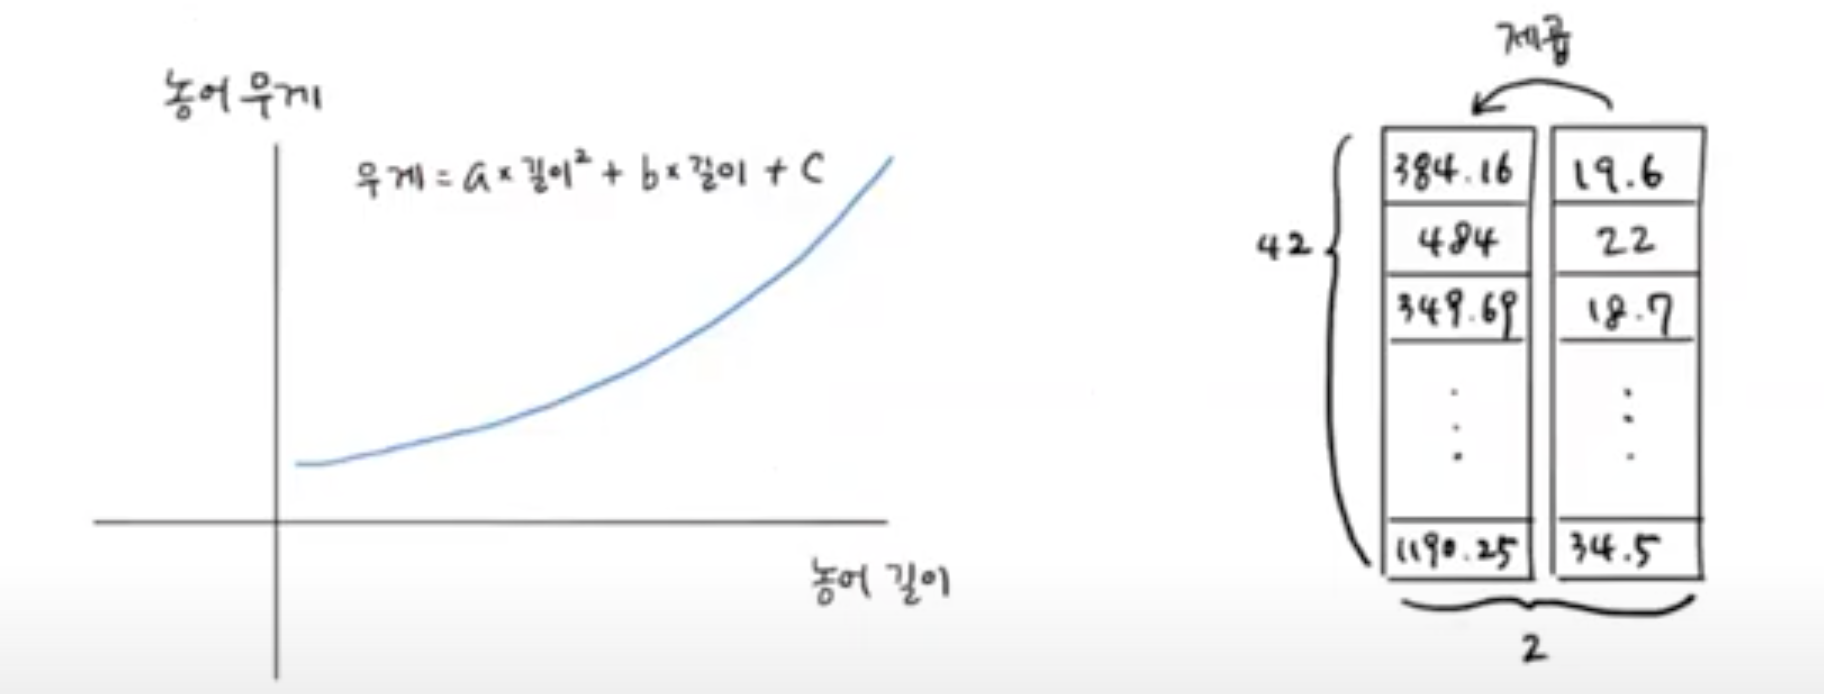

- 만약 2차 방정식의 그래프(위와 같이 곡선형태)를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 한다.(넘파이로 간단히 만들 수 있다.)
- 위와 같이 농어의 길이를 제곱해서 원래 데이터 앞에 붙이기 위해 column_stack() 함수를 이용하고자 한다.

In [16]:
# 각가 훈련, 테스트 세트를 제곱한 것과 원 데이터 두 배열을 나란히 붙이기 - column_stack() 함수 사용
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [17]:
# 데이터 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


- 원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어남.
- 이제 train_poly를 사용하여 선형 회귀 모델을 다시 훈련 -> 이 모델에 2차 방정식의 a, b, c를 잘 찾을 것으로 기대
- 여기서 주목할 점은 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 것이다. (목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.)

In [18]:
# 제곱한 데이터로 다시 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)  # 제곱한 훈련 데이터와 타깃 데이터

# 50cm 농어 예측 - 주의, 앞서 훈련 세트에서 했던 것 처럼 테스트 할 때는 이 모델에 농어 길이의 제곱과 원래 길이를 같이 넣어줘야 함.
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [20]:
# 해당 모델의 훈련한 기울기와 절편 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


- 해당 모델은 **"$무게 = 1.01 \times 길이^2 - 21.6 \times 길이 + 116.05$"**의 그래프를 학습하였다.
- 위 식은 2차 방정식인데 비선형이 아닌가 라고 할 수 있다. 해당 식을 선형 회귀라고 부를 수 있는 것은 "$길이^2$"을 간단히 다른 변수로 치환할 수 있기 때문이다. 가령 "$길이^2 = 왕길이$"로 바꾸게 되면 "$무게 = 1.01 \times 왕길이 - 21.6 \times 길이 + 116.05$" 와 같이 선형 관계 그래프로 표현 가능하다.
- 이런 방정식을 다항식(polynomial)이라 부르고 사용한 선형 회귀를 **다항 회귀(polynomial regression)** 이라고 부른다.

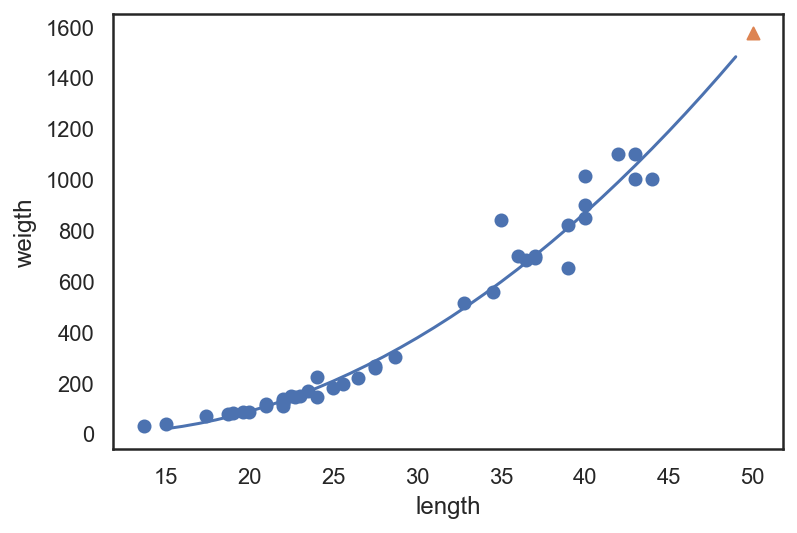

In [21]:
# 2차 방정식의 훈련 세트 산점도 그래프 그리기 

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기 
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기 
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기 
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50 cm 농어 데이터 
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

- 앞의 단순 선형 회귀 모델 보다 훨씬 나은 그래프 완성 
- 훈련 세트의 경향을 잘 따르고 있 무게가 음수로 나오는 일도 없을 듯 하다.

In [23]:
# 다시 R2 스코어로 평가 
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


- 결과 훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌다. 
- 하지만 여전히 테스트의 점수가 더 높아 과소 적합이 아직 남아 있는 듯 하다.
- 조금 더 복잡한 모델이 필요 할 듯 하다.

### 문제 해결 과정 및  결론 
- 문제 해결 과정 및 정리 
    - K-최근접 이웃 회귀를 사용해서 농어의 무게를 예측했을 때 발생하는 큰 문제는 훈련 세트 범위 밖의 샘플을 예측할 수 없다는 점이다. (아무리 멀리 떨어져 있더라도 가장 가까운 샘플 타깃을 평균하여 예측함)
    - 이 문제를 해결하기 위해 사용하는 모델이 바로 선형 회귀이다. 선형 회귀는 훈련 세트에 잘 맞는 직선의 방정식을 찾는 것이다. (사이킷런의 LinearRegresison 클래스를 사용)
    - 가장 잘 맞는 직선의 방정식을 찾는다는 것은 최적의 기울기와 절편을 구한다는 의미이다. 이 값들은 선형 회귀 모델의 coef_, intercept_ 속성에 저장되어 있다.
    - 단순 선형 회귀로 예측한 결과, K-근접 이웃 회귀와 다르게 훈련 세트를 벗어난 범위의 데이터도 잘 예측했다. 하지만 모델이 단순하여 농어의 무게가 음수일 수도 있다라는 문제가 발생하였다. 이 문제를 해결하기 위해 다항 회귀를 사용하였다.
    - 간단히 농어의 길이를 제곱하여 훈련 세트에 추가한 다음, 선형 회귀 모델을 다시 훈련 시킴, 이 모델은 2차 방정식의 그래프 형태를 학습하였고, 훈련 세트가 분포된 형태를 잘 표현하였다.
- 결론 
    - 첫 번째 단순 선형 회귀 모델을 훈련한 뒤 R2 스코어로 모델을 평가 한 결과, 훈련 세트: 0.94, 테스트 세트: 0.82로 나왔으며 훈련 세트의 점수가 높아 과대 적합 처럼 보였지만 과소적합이라고 판단 되었다.
    - 두 번째 2차 방정식을 이용한 다항 회귀 모델로 다시 훈련한 뒤 R2 스코어로 모델을 평가 한 결과, 훈련 세트: 0.9706, 테스트 세트: 0.9776으로 두 데이터가 비슷한 결과가 나왔지만 테스트 세트의 점수가 높아 여전히 과소 적합 문제가 발생한 것으로 판단 되었다. 
- 개선점
    - 여전히 과소 적합 문제가 발생하고 있으므로 조금 더 복잡한 모델링 방법으로 문제 해결 예정 (다음 장에서)